# **19CSE456: Neural Network and Deep Learning (LAB 1)**
#**Perceptron**
---


#**B Sudharshan - CB.EN.U4CSE19008 - CSE A**

# **Perceptron**
In supervised learning, a perceptron is a form of a linear classifier. So, any dataset that can be divided by a single straight line can be classified using a perceptron, i.e., any dataset that looks like this: 
Reference : https://www.askpython.com/python/examples/single-perceptron-neural-network

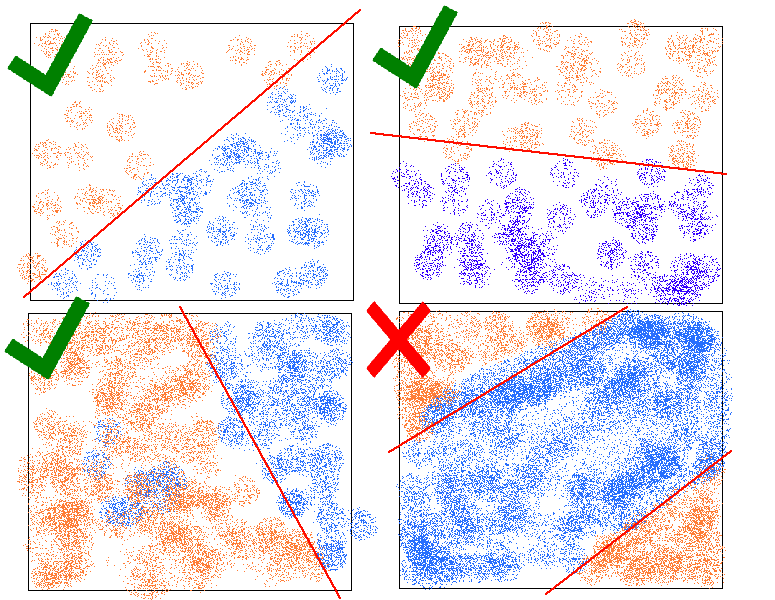

**Create a sample dataset**

In [1]:
import pandas as pd
import numpy as np
import random
#Dataset
df = pd.DataFrame()
df['x1']= [random.randint(1,20) for x in range(10)]
df['x2'] = [random.randint(1,20) for x in range(10)]
print("Shape of the dataset",df.shape)
df.head()


Shape of the dataset (10, 2)


,x1,x2
0,15,15
1,9,2
2,6,6
3,16,16
4,19,4


In [2]:
#Generate labels in such a way that the final data is lineary seperable.  
#every point below the line is y<x and every point above the line is mean y>x '''
label=[]
for i in range(df.shape[0]):
  if df.iloc[i,0] < df.iloc[i,1]:
    label.append(1)
  else:
    label.append(-1)
 
df['label'] = label
df


,x1,x2,label
0,15,15,-1
1,9,2,-1
2,6,6,-1
3,16,16,-1
4,19,4,-1
5,11,12,1
6,20,14,-1
7,20,19,-1
8,4,20,1
9,12,5,-1


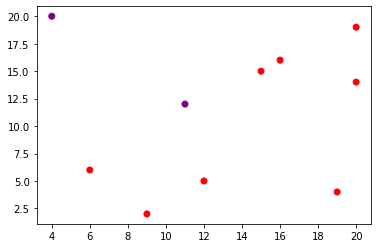

In [3]:
import matplotlib.pyplot as plt
import matplotlib
colors = ['red','green','blue','purple']
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
plt.scatter(df['x1'], df['x2'], c=df['label'], cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

**Initialize weights for the values**

Random uniform distribution for weights:

In [4]:
#weights and bias
weights = [np.round(random.uniform(-0.99,0.99),2) for i in range(2)]
print(weights) # Two weights, one corresponds to x1(column 1) one corresponds to x2(column 2)

[0.52, -0.46]


Multiply the weights with the input data points and sum:


In [5]:
w = weights.copy()
print(w)
X = [[df.iloc[i,0],df.iloc[i,1]] for i in range(df.shape[0])]
wx = [X[i][0]*w[0]+X[i][1]*w[1] for i in range(df.shape[0])]
print(wx)


[0.52, -0.46]
[0.9000000000000004, 3.76, 0.3599999999999999, 0.96, 8.040000000000001, 0.20000000000000018, 3.96, 1.6600000000000001, -7.120000000000001, 3.94]


**Creating the Activation Function**

If wx <=0 , then output is 0. Else, the output is 1.



In [6]:
for i in range(df.shape[0]):
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    w[0] = w[0] + err
    w[1] = w[1] + err

In [7]:
for i in range(df.shape[0]):
  print('wx : ',wx[i])
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  print('label=',df['label'][i])
  print('pred = ',pred)
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    print('err',err)
    print('before', w[0],w[1])
    w[0] = w[0] + err
    w[1] = w[1] + err
    print('after',w[0],w[1])
  else:
    print('w_i', w[0],w[1])

wx :  0.9000000000000004
label= -1
pred =  1
err -2
before -13.48 -14.46
after -15.48 -16.46
wx :  3.76
label= -1
pred =  1
err -2
before -15.48 -16.46
after -17.48 -18.46
wx :  0.3599999999999999
label= -1
pred =  1
err -2
before -17.48 -18.46
after -19.48 -20.46
wx :  0.96
label= -1
pred =  1
err -2
before -19.48 -20.46
after -21.48 -22.46
wx :  8.040000000000001
label= -1
pred =  1
err -2
before -21.48 -22.46
after -23.48 -24.46
wx :  0.20000000000000018
label= 1
pred =  1
w_i -23.48 -24.46
wx :  3.96
label= -1
pred =  1
err -2
before -23.48 -24.46
after -25.48 -26.46
wx :  1.6600000000000001
label= -1
pred =  1
err -2
before -25.48 -26.46
after -27.48 -28.46
wx :  -7.120000000000001
label= 1
pred =  -1
err 2
before -27.48 -28.46
after -25.48 -26.46
wx :  3.94
label= -1
pred =  1
err -2
before -25.48 -26.46
after -27.48 -28.46


In [8]:
# print the final weights
print('Final weights (%f,%f) : '%(w[0],w[1]))

Final weights (-27.480000,-28.460000) : 


**Testing our model on another data**

In [9]:
#Test Dataset
new_df = pd.DataFrame()
new_df['x'] = [random.randint(1,20) for x in range(100)]
new_df['y'] = [random.randint(1,20) for x in range(100)]


label_text = []
for i in range(new_df.shape[0]):
  if new_df.iloc[i,0] < new_df.iloc[i,1]:
    label_text.append(1)
  else:
    label_text.append(-1)
new_df['labels']=label_text

In [10]:
new_df.head()

,x,y,labels
0,13,8,-1
1,6,4,-1
2,10,7,-1
3,7,1,-1
4,13,16,1


In [11]:
#Calculate the prediction using the learned weights w0 and w1
new_wX = w[0]*new_df['x']+w[1]*new_df['y'] 

In [12]:
new_df['given label'] = label_text
pred_label_text = []
 
for i in range(new_df.shape[0]):
  if new_wX[i]>=0:
    pred_label_text.append(-1)
  else:
    pred_label_text.append(1)
 
new_df['predicted labels'] = pred_label_text

In [13]:
new_df

,x,y,labels,given label,predicted labels
0,13,8,-1,-1,1
1,6,4,-1,-1,1
2,10,7,-1,-1,1
3,7,1,-1,-1,1
4,13,16,1,1,1
...,...,...,...,...,...
95,10,9,-1,-1,1
96,2,5,1,1,1
97,13,15,1,1,1
98,9,12,1,1,1


# **Excercise**

**Excercise 1:** 

Generate the following data , append random labels

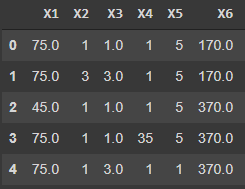

**Excercise 2:**  
Use a single-layer perceptron model to separate classes in the Iris database of the UCI Machine Learning Repository: http://www.ics.uci.edu/~mlearn/MLRepository.html
Describe your neural network design. Tabulate your percentage correct classification results - what can you infer from the network performance?


Excercise 1:
---
---------

In [16]:
df1 = pd.DataFrame()
df1['x1']= [75.0,75.0,75.0,75.0,75.0]
df1['x2'] = [1,3,1,1,1]
df1['x3']=[1.0,3.0,1.0,1.0,3.0]
df1['x4']=[1,1,1,35,1]
df1['x5']=[5,5,5,5,1]
df1['x6']=[170.0,170.0,370.0,370.0,370.0]
print("Shape of the dataset",df1.shape)
df1.head()

Shape of the dataset (5, 6)


,x1,x2,x3,x4,x5,x6
0,75.0,1,1.0,1,5,170.0
1,75.0,3,3.0,1,5,170.0
2,75.0,1,1.0,1,5,370.0
3,75.0,1,1.0,35,5,370.0
4,75.0,1,3.0,1,1,370.0


In [33]:
label=[]
for i in range(df1.shape[0]):
  if df1.iloc[i,0]*4 < df1.iloc[i,5]:
    label.append(1)
  else:
    label.append(-1)
 
df1['label'] = label
df1

,x1,x2,x3,x4,x5,x6,label
0,75.0,1,1.0,1,5,170.0,-1
1,75.0,3,3.0,1,5,170.0,-1
2,75.0,1,1.0,1,5,370.0,1
3,75.0,1,1.0,35,5,370.0,1
4,75.0,1,3.0,1,1,370.0,1


In [34]:
import random
weights = [np.round(random.uniform(-0.99,0.99),2) for i in range(2)]
print(weights)

[-0.97, -0.09]


In [35]:
w = weights.copy()
print(w)
X = [[df1.iloc[i,0],df1.iloc[i,1]] for i in range(df1.shape[0])]
wx = [X[i][0]*w[0]+X[i][1]*w[1] for i in range(df1.shape[0])]
print(wx)

[-0.97, -0.09]
[-72.84, -73.02, -72.84, -72.84, -72.84]


In [36]:
for i in range(df1.shape[0]):
  print('wx : ',wx[i])
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  print('label=',df1['label'][i])
  print('pred = ',pred)
  if pred != df1['label'][i] :
    err = df1['label'][i] - pred
    print('err',err)
    print('before', w[0],w[1])
    w[0] = w[0] + err
    w[1] = w[1] + err
    print('after',w[0],w[1])
  else:
    print('w_i', w[0],w[1])

wx :  -72.84
label= -1
pred =  -1
w_i -0.97 -0.09
wx :  -73.02
label= -1
pred =  -1
w_i -0.97 -0.09
wx :  -72.84
label= 1
pred =  -1
err 2
before -0.97 -0.09
after 1.03 1.91
wx :  -72.84
label= 1
pred =  -1
err 2
before 1.03 1.91
after 3.0300000000000002 3.91
wx :  -72.84
label= 1
pred =  -1
err 2
before 3.0300000000000002 3.91
after 5.03 5.91


In [37]:
print('Final weights (%f,%f) : '%(w[0],w[1]))

Final weights (5.030000,5.910000) : 


In [38]:
new_df = pd.DataFrame()
new_df['x1']= [45.0, 45.0, 75.0, 75.0, 75.0]
new_df['x2'] = [3, 3, 1, 1, 3]
new_df['x3'] = [3.0, 3.0, 1.0, 1.0, 1.0]
new_df['x4'] = [1, 1, 1, 1, 1]
new_df['x5'] = [5, 5, 5, 5, 1]
new_df['x6'] = [170.0, 170.0, 370.0, 370.0, 370.0]


label_text = []
for i in range(new_df.shape[0]):
  if new_df.iloc[i,1] == new_df.iloc[i,3]:
    label_text.append(1)
  else:
    label_text.append(-1)
new_df['labels']=label_text
new_df.head()

,x1,x2,x3,x4,x5,x6,labels
0,45.0,3,3.0,1,5,170.0,-1
1,45.0,3,3.0,1,5,170.0,-1
2,75.0,1,1.0,1,5,370.0,1
3,75.0,1,1.0,1,5,370.0,1
4,75.0,3,1.0,1,1,370.0,-1


In [40]:
new_wX = w[0]*new_df['x2']+w[1]*new_df['x6'] 
new_df['given label'] = label_text
pred_label_text = []
 
for i in range(new_df.shape[0]):
  if new_wX[i]>=0:
    pred_label_text.append(-1)
  else:
    pred_label_text.append(1)
 
new_df['predicted labels'] = pred_label_text

In [41]:
new_df

,x1,x2,x3,x4,x5,x6,labels,given label,predicted labels
0,45.0,3,3.0,1,5,170.0,-1,-1,-1
1,45.0,3,3.0,1,5,170.0,-1,-1,-1
2,75.0,1,1.0,1,5,370.0,1,1,-1
3,75.0,1,1.0,1,5,370.0,1,1,-1
4,75.0,3,1.0,1,1,370.0,-1,-1,-1


Excercise 2:
---
-----------------

In [55]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
X = iris.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [21]:
y = iris.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [23]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

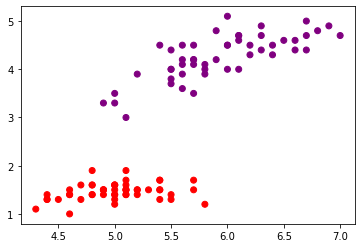

In [27]:
colors = ['red','green','blue','purple']
colormap = np.array(['red', 'lightseagreen', '#F39C12'])
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

In [42]:
weights = [np.round(random.uniform(-0.99,0.99),2) for i in range(5)]
print(weights)

[-0.43, -0.23, -0.44, 0.26, -0.85]


In [48]:
import pandas

In [ ]:
for i in range(df.shape[0]):
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  if pred != y.to_numpy()[i] :
    err = y.to_numpy()[i] - pred
    w[0] = w[0] + err
    w[1] = w[1] + err
    w[2] = w[2] + err
    w[3] = w[3] + err

In [ ]:
y_pred = np.zeros(shape=X.shape[0])
for i in range(X.shape[0]):
  print('wx : ',wx[i])
  if wx[i]<=0:
    pred = 0
  else:
    pred = 1
  print('label=',y.to_numpy()[i])
  print('pred = ',pred)
  y_pred[i] = pred
  if pred != y.to_numpy()[i] :
    err = y.to_numpy()[i] - pred
    print('err',err)
    print('before', w[0],w[1],w[2],w[3])
    w[0] = w[0] + err
    w[1] = w[1] + err
    w[2] = w[2] + err
    w[3] = w[3] + err
    print('after',w[0],w[1],w[2],w[3])
  else:
    print('w_i', w[0],w[1],w[2],w[3])

In [ ]:
df['predicted']=y_pred

In [ ]:
print('Final weights (%f,%f,%f,%f) : '%(w[0],w[1],w[2],w[3]))

Inference
---
-----------

Generated Labels for the dataset and calculated Perceptron